<a href="https://colab.research.google.com/github/hankou-code/phys/blob/main/3_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Sn = 72.0 / 1000
phi_0 = 5

phi_up = np.array([5.5, 6.0, 6.5, 6.9, 7.5, 7.9, 8.3])
phi_down = np.array([4.9, 4.8, 4.6, 4.5, 4.4, 4.3, 4.2])

# Тл
B_up = ( ((phi_up - phi_0) / 100) / Sn )
B_down = ( ((phi_0 - phi_down) / 100) / Sn )

B_down = np.array([0.7, 1.4, 2.9, 3.6, 4.3, 5.0, 5.8])
I = np.array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75])

delta_P_up_cu = np.array([0, -2, -1, -3, -6, -12, -15, -18, -20])
delta_P_down_cu = np.array([-1, -1, -1, -2, -6, -10, -16, -18, -20])
I_cuprum = np.array([0.0, 0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 2.75, 3.0])

delta_P_up_al = np.array([-2, -2, 2, 10, 20, 32, 45])
delta_P_down_al = np.array([-2, 0, 6, 14, 25, 36, 45])
I_aluminum = np.array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75])


Вспомогательные функции

In [ ]:
class DataHandler:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def computation_coefficients_with_lsm(self):
        # y = mx + c -----> y = Ap
        A = np.vstack([self.x, np.ones(len(self.x))]).T
        m, c = np.linalg.lstsq(A, self.y, rcond=None)[0]
        self.m = m
        self.c = c
    
    def computation_std_and_relative_error(self):
        # y_predicted was predicted with using the least squares method
        # absolute_diff_y = y - y_predicted
        absolute_diff_y = self.y - self.m * self.x - self.c
        # standart deviation of y
        y_std = absolute_diff_y.std(axis=0, ddof=1)
        y_mean = self.y.mean()
        # relative error in determining the value of v [in percentes]
        y_relative = y_std / y_mean * 100
        self.y_std = y_std
        self.y_relative = y_relative

    def print_data(self):
        print(f"y = {self.m:.{3}}x + {self.c:.{3}}")
        print(f"std: {self.y_std:.{3}}")
        print(f"relative error: {self.y_relative:.{3}}%")

    def computation(self):
        self.computation_coefficients_with_lsm()
        self.computation_std_and_relative_error()

    def return_data_for_plotting(self, fmt='b-', label_name='Origin'):
        return [self.x, self.y, self.y_std, label_name, fmt]

    def return_theoretical_data_for_plotting(self, fmt='r', label_name="Theoretical"):
        y = self.m * self.x + self.c
        label_name += f" predicted: [y={self.m:.{3}}*x + {self.c:.{3}}, std = {self.y_std:.{3}}, relative = {self.y_relative:.{3}}%] "
        return [self.x, y, self.y_std, label_name, fmt]

    def return_theoretical_coefs(self):
        return self.m, self.c

In [ ]:
def plot_several_lines(data, xlabel, ylabel, name_shedule="test_plot"):
    plt.figure(figsize=(15, 9))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for x, y, y_std, label_name, fmt in data:
        plot_line(x, y, y_std, label_name, fmt)
    save_plot(name_shedule=name_shedule)

def plot_line(x, y, y_std, label_name, fmt='b-'):
    plt.plot(x, y, 'o', label=label_name, markersize=2)
    plt.errorbar(x, y, yerr=y_std, fmt=fmt)
    plt.legend()

def save_plot(name_shedule="test_plot",
              images_dir = '/content/gdrive/My Drive/phys_labs/'):
    # saving image at google drive
    plt.savefig(f"{images_dir}/{name_shedule}.png", dpi = 300)

In [ ]:
def prepare_data(x, y, name, fmt):
    handler = DataHandler(x, y)
    handler.computation()

    curve_data = handler.return_data_for_plotting(label_name=name, fmt=fmt)
    theoretical_curve_data = handler.return_theoretical_data_for_plotting(label_name=name)

    prepared_data = np.concatenate(([curve_data], [theoretical_curve_data]), axis=0)

    theoretical_coefs = handler.return_theoretical_coefs()

    return prepared_data, theoretical_coefs

Загрузка данных.

In [ ]:
x = I
y_up = B_up
y_down = B_down

Построим графики для меди и алюминия

In [ ]:
def convert_I_to_B_up(I, data):
    # B = k * I + b
    k = data[0]
    b = data[1]
    return k * I + b

def convert_I_to_B_down(I, data):
    # B = k * I + b
    k = data[0]
    b = data[1]
    return k * I + b


Калбировка

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


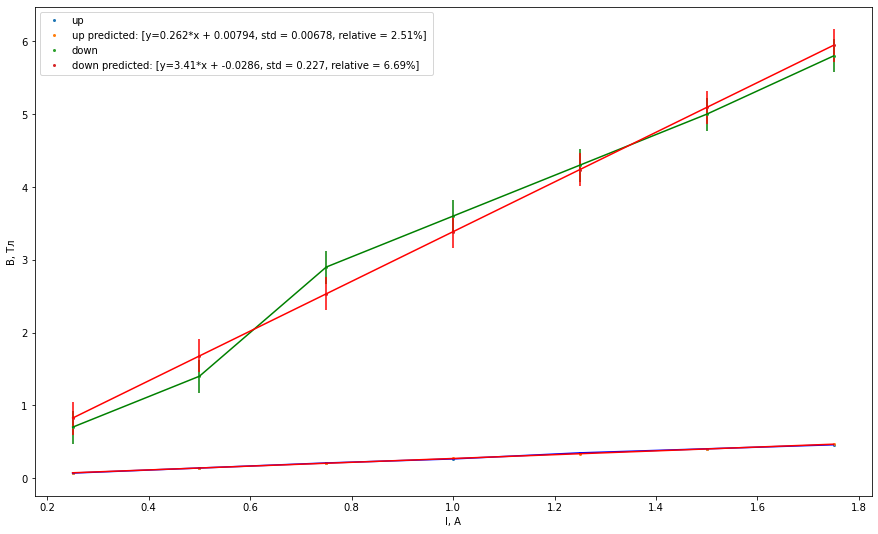

In [ ]:
prepared_up_data, th_up_data = prepare_data(x, y_up, name="up", fmt='b-')
prepared_down_data, th_down_data = prepare_data(x, y_down, name="down", fmt='g-')

data = np.concatenate([prepared_up_data, prepared_down_data], axis=0)

plot_several_lines(data, xlabel="I, А", ylabel='B, Тл', name_shedule="Калибровка электромагнита")

In [ ]:
x_up_al = np.square(convert_I_to_B_up(I_aluminum, th_up_data)) # B^2
y_up_al = delta_P_up_al # dP

x_down_al = np.square(convert_I_to_B_down(I_aluminum, th_down_data)) # B^2
y_down_al = delta_P_down_al # dP

x_up_cu = np.square(convert_I_to_B_up(I_cuprum, th_up_data)) # B^2
y_up_cu = delta_P_up_cu # dP



x_down_cu = np.square(convert_I_to_B_down(I_cuprum, th_down_data)) # B^2
y_down_cu = delta_P_down_cu # dP

print("________________")
print("________________")
print(x_up_cu)
print("________________")

________________
________________
[6.29881582e-05 5.38942429e-03 1.92901235e-02 7.28143109e-02
 1.60635551e-01 2.82753842e-01 4.39169186e-01 5.30238253e-01
 6.29881582e-01]
________________


Алюминий и медь при повышении тока

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


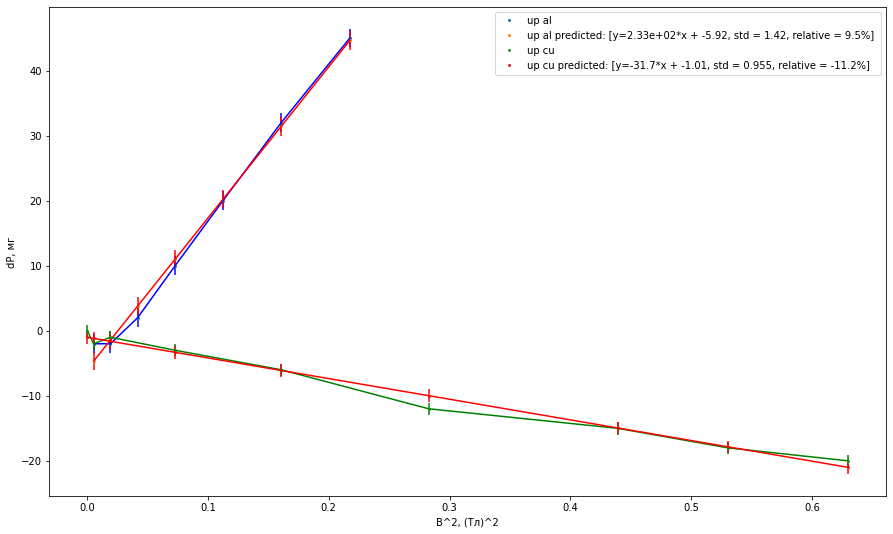

In [ ]:
prepared_up_al_data, th_up_data_al = prepare_data(x_up_al, y_up_al, name="up al", fmt='b-')
prepared_up_cu_data, th_up_data_cu = prepare_data(x_up_cu, y_up_cu, name="up cu", fmt='g-')
data = np.concatenate([prepared_up_al_data, prepared_up_cu_data], axis=0)

plot_several_lines(data, xlabel="B^2, (Тл)^2", ylabel='dP, мг', name_shedule="вверх")

Алюминий и медь при понижении тока

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


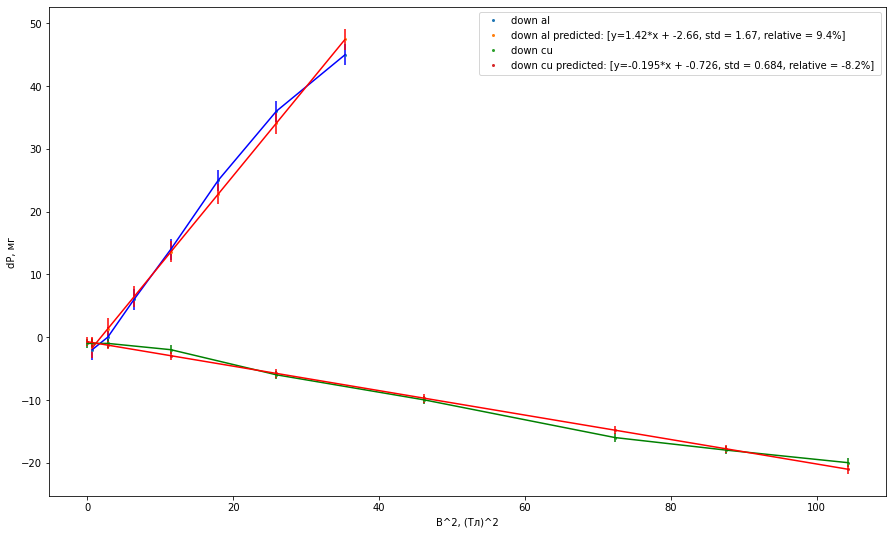

In [ ]:
prepared_down_al_data, th_down_data_al = prepare_data(x_down_al, y_down_al, name="down al", fmt='b-')
prepared_down_cu_data, th_down_data_cu = prepare_data(x_down_cu, y_down_cu, name="down cu", fmt='g-')

data = np.concatenate([prepared_down_al_data, prepared_down_cu_data], axis=0)

plot_several_lines(data, xlabel="B^2, (Тл)^2", ylabel='dP, мг', name_shedule="вниз")